# Análise das amostras de magnitudes de galáxias 

## Setup

importando as bibliotecas que serão utilizadas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

definindo algumas variáveis que serão úteis e realizando a leitura do arquivo .train

In [3]:
headers=[
    "u_auto", "u_auto_err", "u_det", "u_det_err",
    "g_auto", "g_auto_err", "g_det", "g_det_err", 
    "r_auto", "r_auto_err", "r_det", "r_det_err", 
    "i_auto", "i_auto_err", "i_det", "i_det_err", 
    "z_auto", "z_auto_err", "z_det", "z_det_err", 
    "Y_auto", "Y_auto_err", "Y_det", "Y_det_err", 
    "z", "ra", "dec", "z_flags", "field_id", "number"
]

banda_cor = {
    "u": "m",
    "g": "g",
    "r": "b",
    "i": "r",
    "z": "y",
    "Y": "k",
}

data_frame = pd.read_csv("des_sv_main_standard.train", delimiter=" ", names=headers)

Como alguns gráficos terão algumas configurações padões, temos uma função que auxiliará na criação

In [4]:
def configuracoes_padrao(label_x, label_y, banda, x_limit=120, y_limit=120):
    plt.xlabel(f"{label_x} ({banda}-band)", fontsize=14)
    plt.ylabel(label_y, fontsize=14)
    plt.xlim(0, x_limit)
    plt.ylim(0, y_limit)
    plt.tight_layout()

### Analisando amostra por valor de magnitude (aparente?) e erro (no cálculo ou captura da amostra)

Primeiro, foi olhado o conteúdo separado, para ter uma noção de que estamos lidando

In [5]:
def monta_grafico_plot(x, y, posicao, banda, cor, x_limit=120, y_limit=120):
    plt.subplot(2,3,posicao)
    plt.plot(x, y, f"{cor}.", alpha=0.5)
    configuracoes_padrao("magnitude", "error", banda, x_limit, y_limit)

Analisando, pode-se notar que dentro da nossa amostra total, existem alguns pontos com valores de erro e magnitude bem altos.

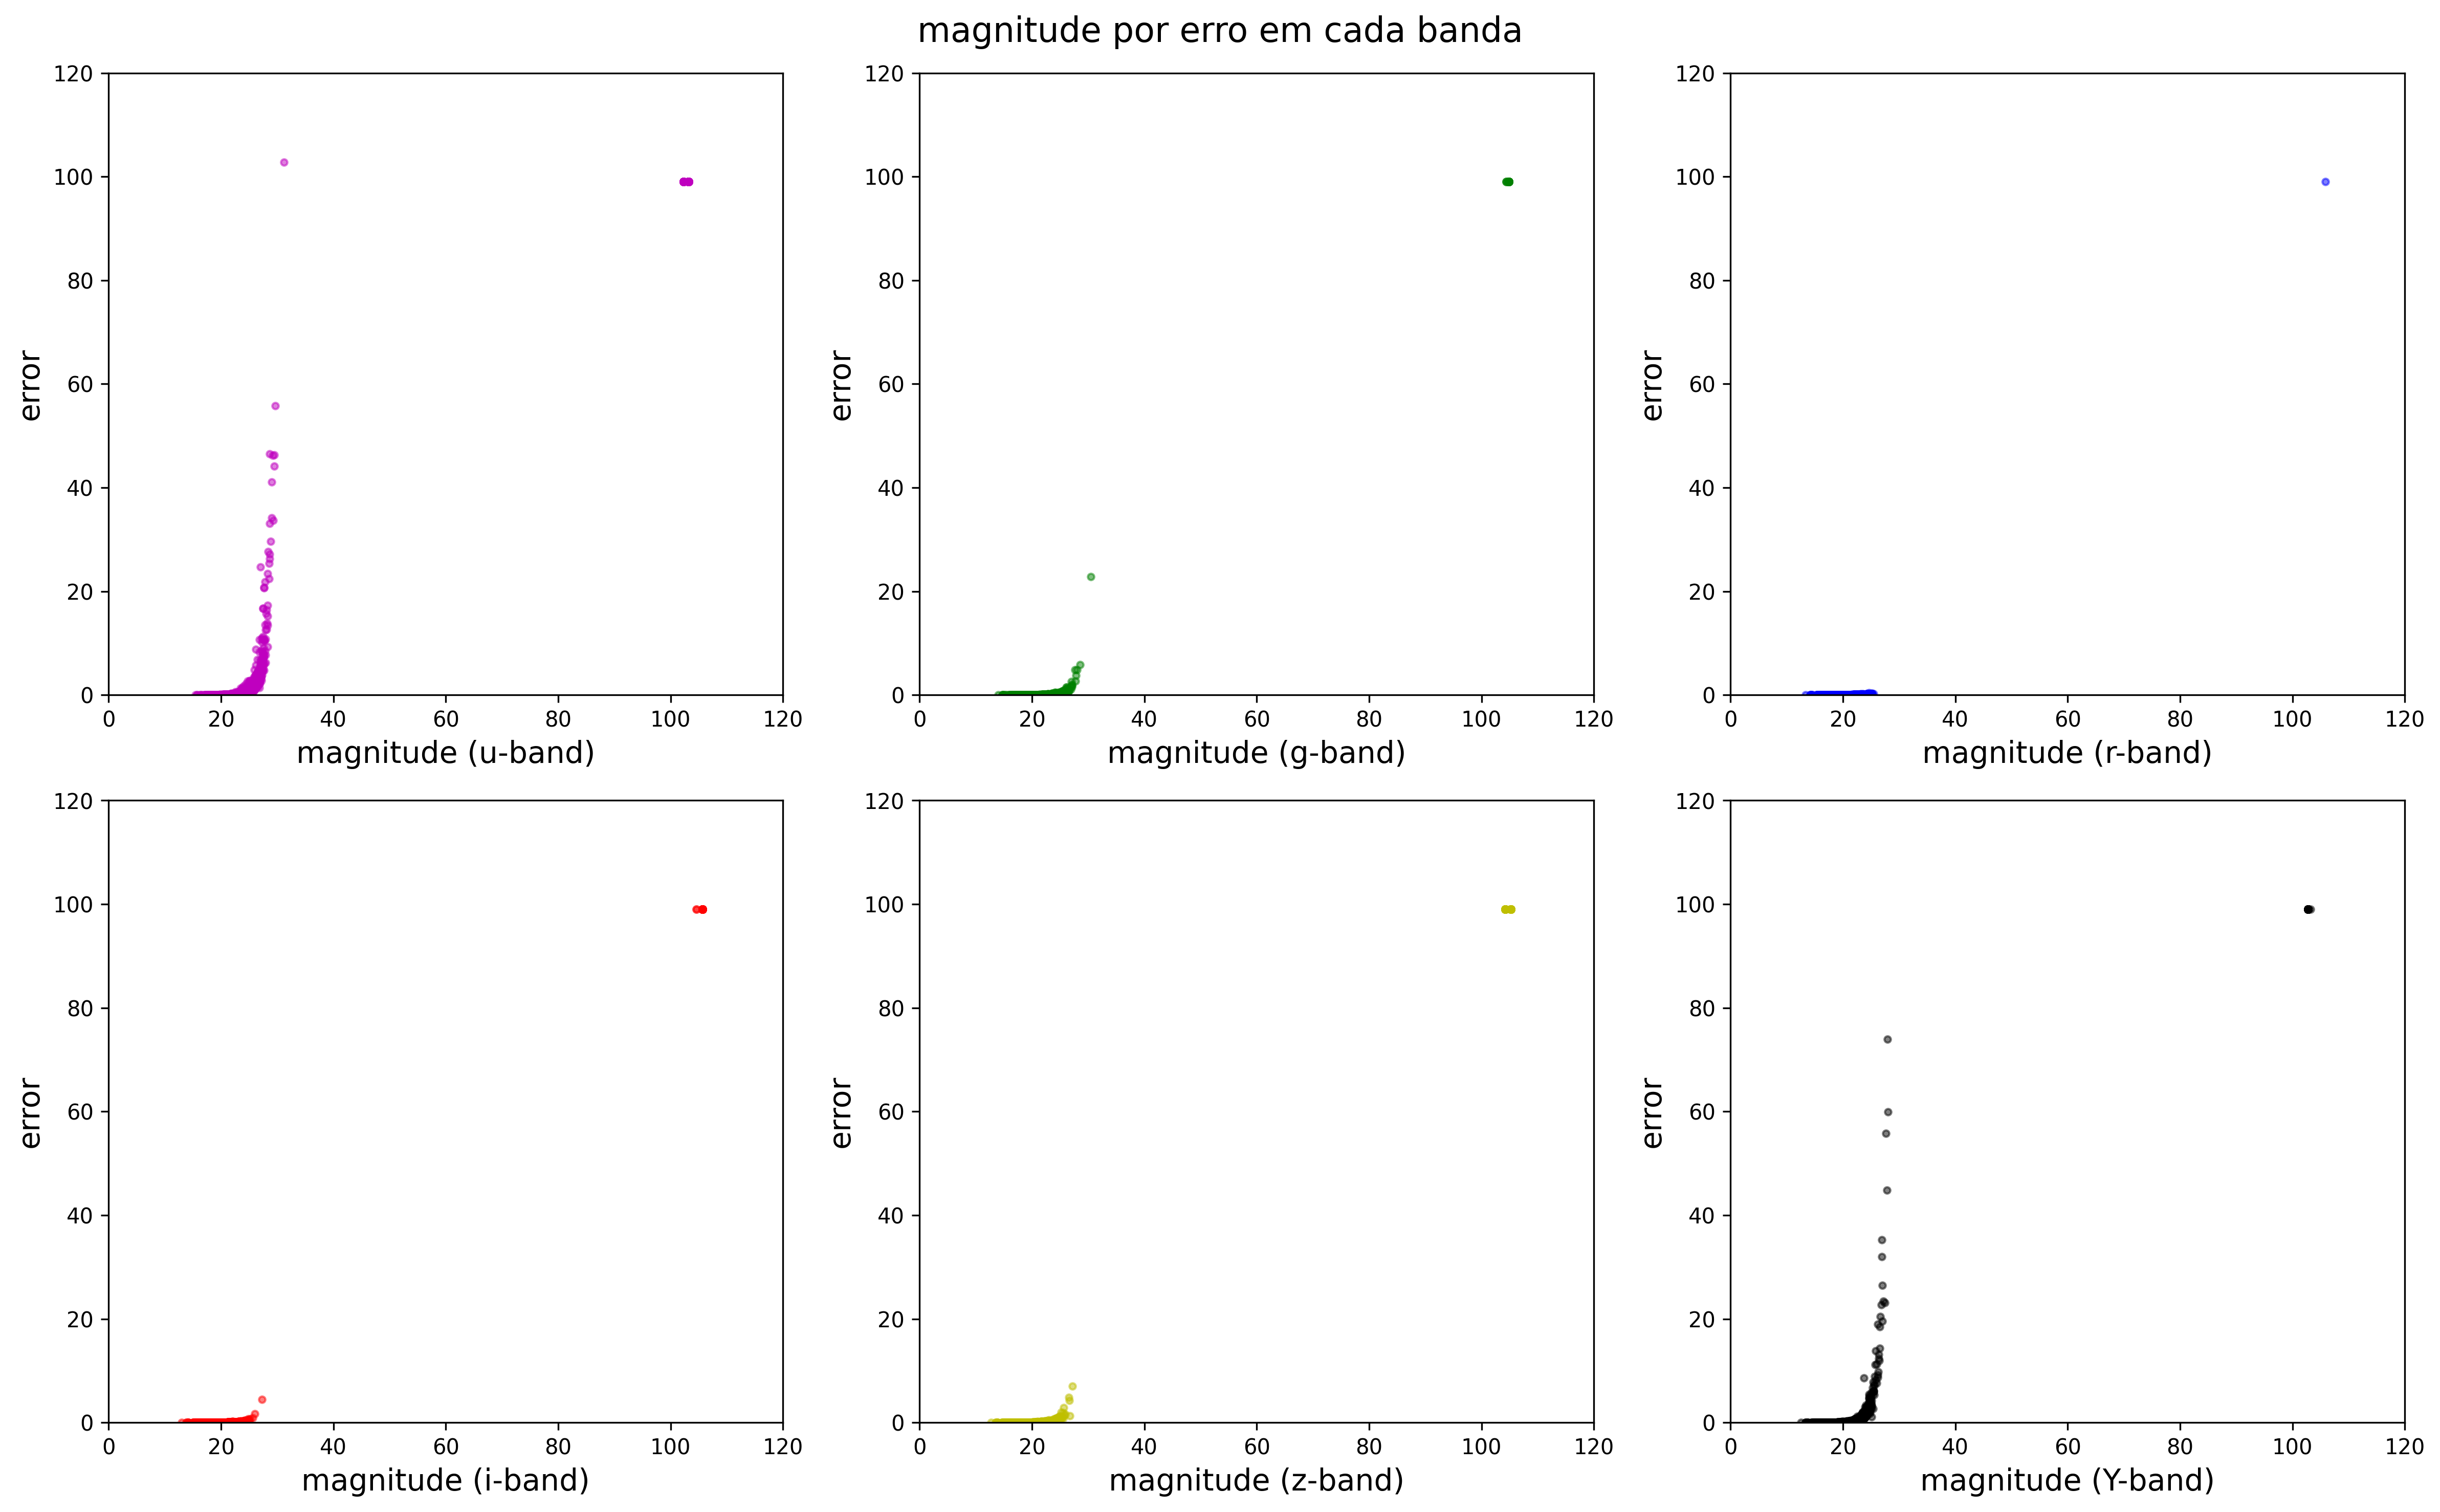

In [79]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("magnitude por erro em cada banda", fontsize=16)

pos = 1

for key, value in banda_cor.items():
    monta_grafico_plot(data_frame[f"{key}_auto"], data_frame[f"{key}_auto_err"], pos, key, value)
    pos = pos + 1

Se quisermos dar uma olhada mais de perto, podemos perceber que o erro na captura da banda r é extremamente baixo em comparação aos demais.

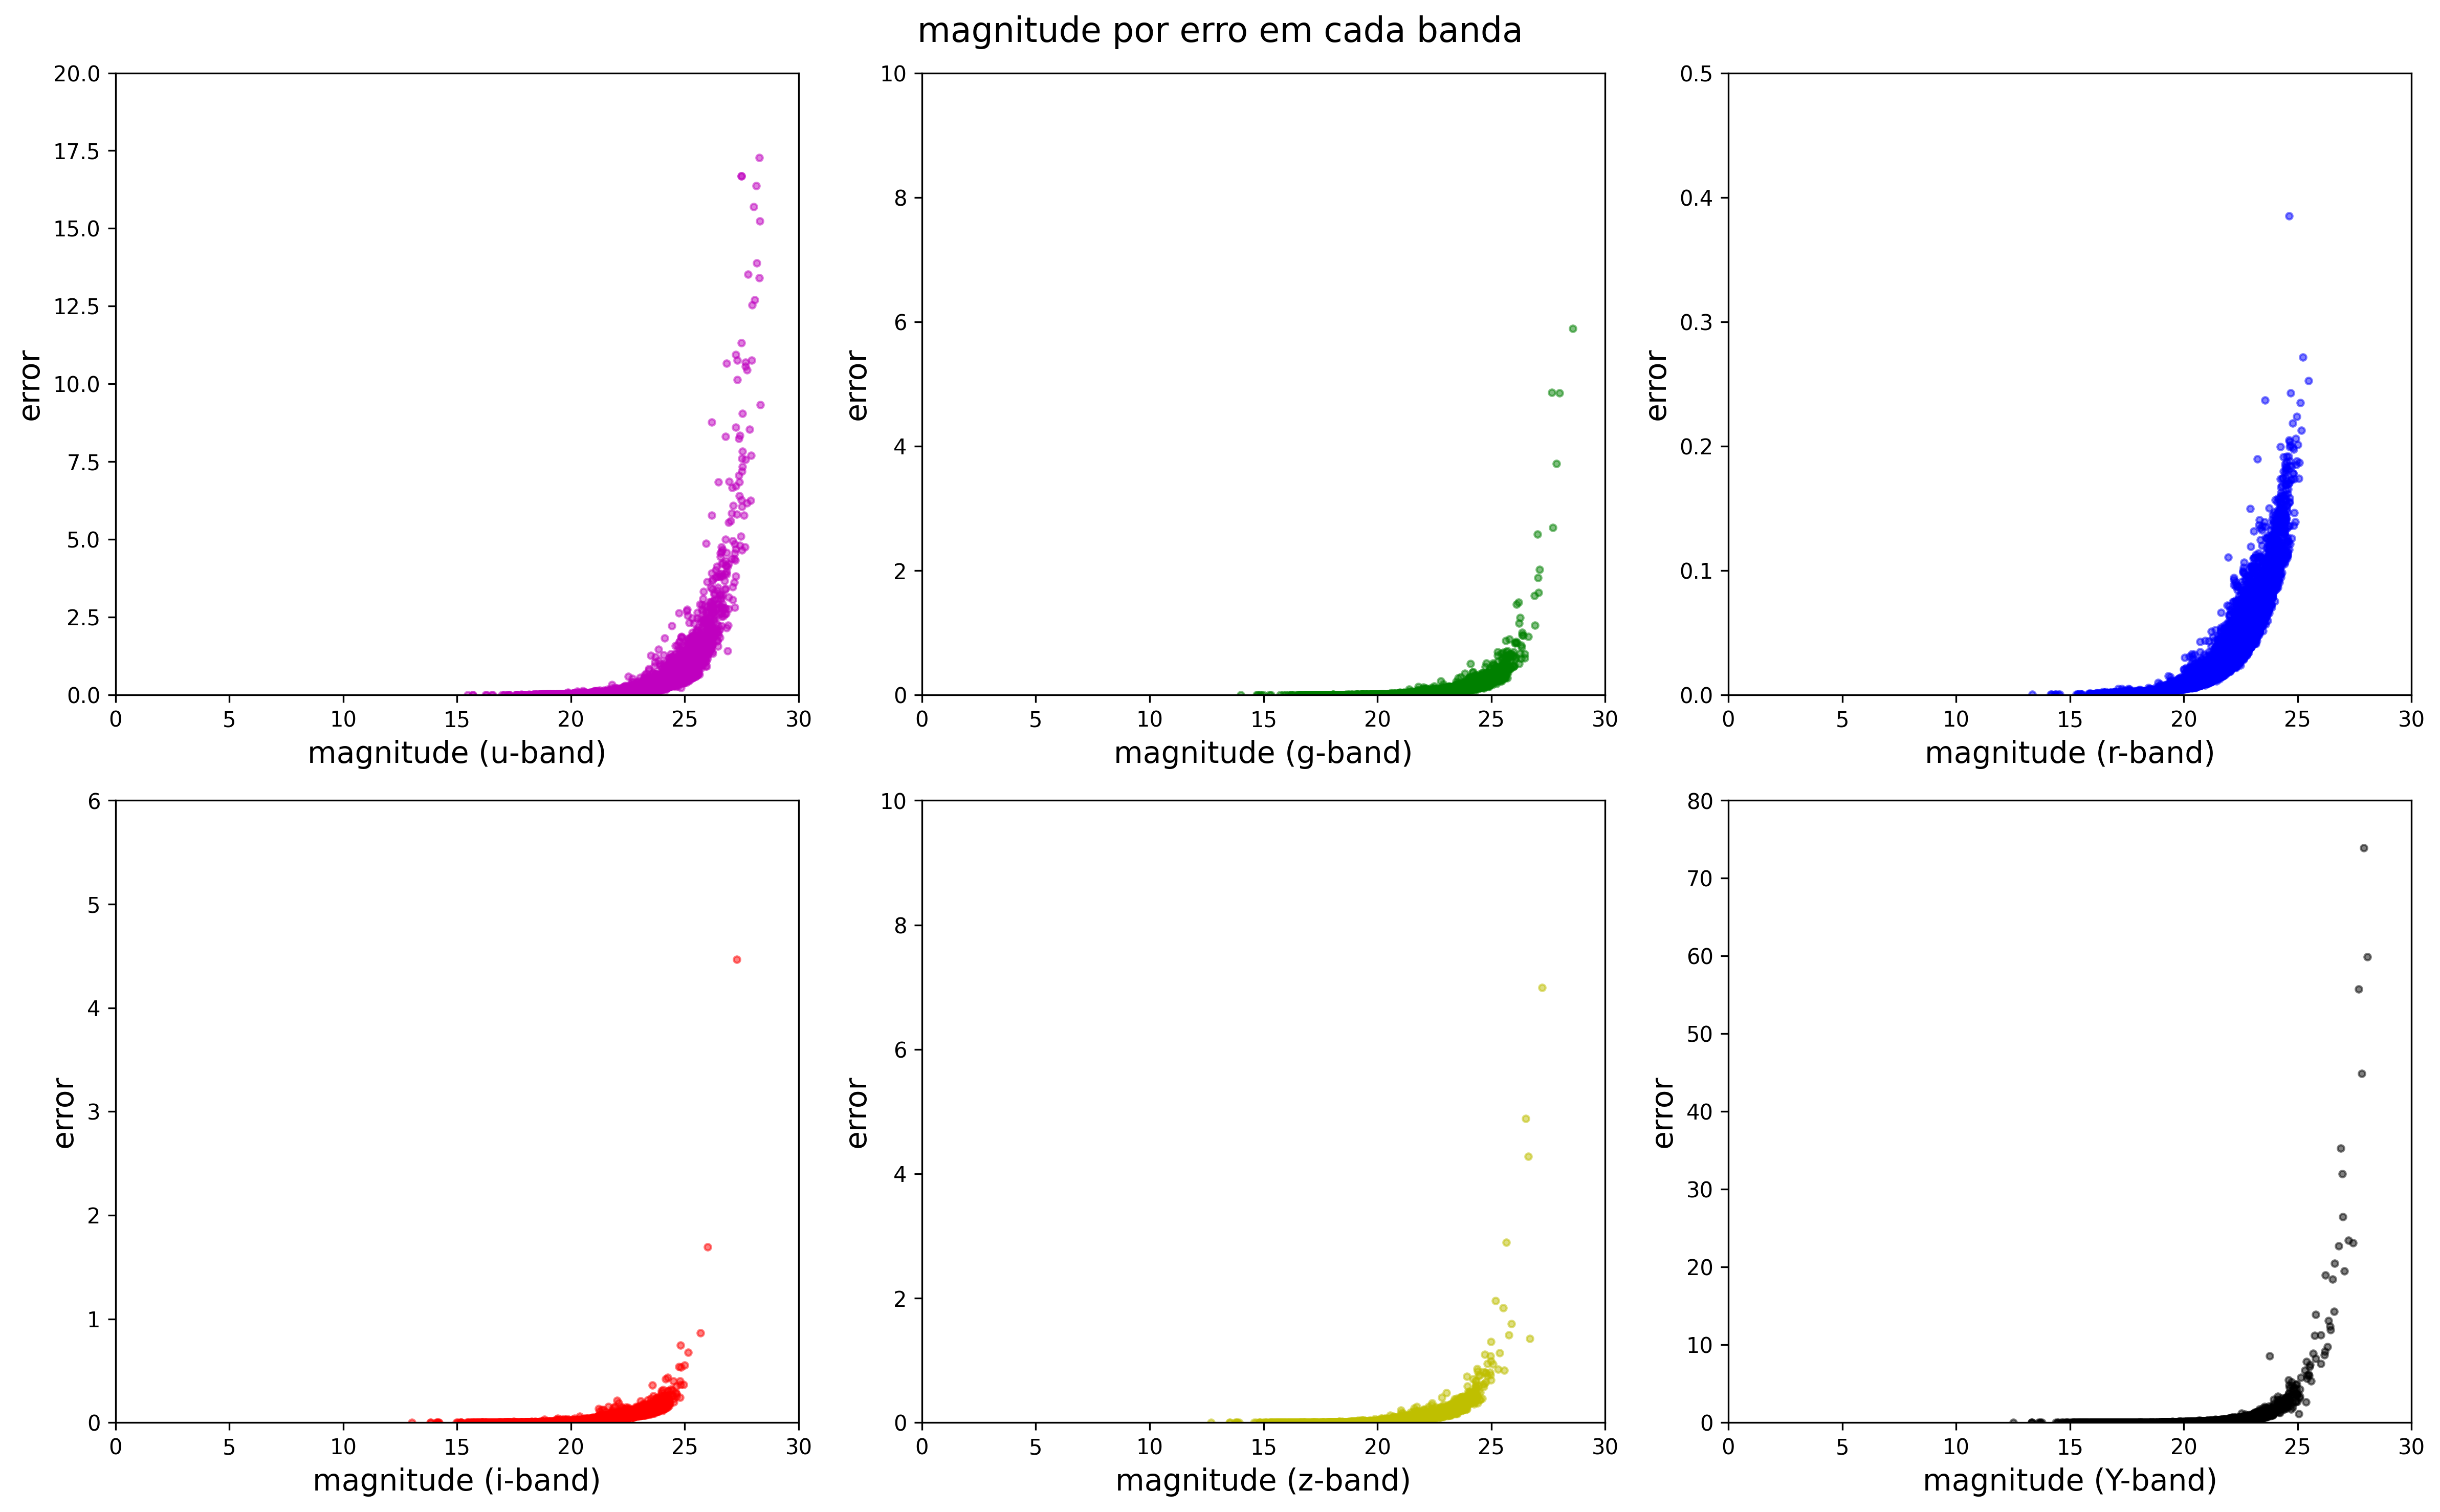

In [7]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("magnitude por erro em cada banda", fontsize=16)

monta_grafico_plot(data_frame.u_auto, data_frame.u_auto_err, 1, "u", "m", 30, 20)
monta_grafico_plot(data_frame.g_auto, data_frame.g_auto_err, 2, "g", "g", 30, 10)
monta_grafico_plot(data_frame.r_auto, data_frame.r_auto_err, 3, "r", "b", 30, 0.5)
monta_grafico_plot(data_frame.i_auto, data_frame.i_auto_err, 4, "i", "r", 30, 6)
monta_grafico_plot(data_frame.z_auto, data_frame.z_auto_err, 5, "z", "y", 30, 10)
monta_grafico_plot(data_frame.Y_auto, data_frame.Y_auto_err, 6, "Y", "k", 30, 80)

Para comparação, se adicionado em um único gráfico percebemos que no geral, a banda u e a banda Y recebem maior destaque por possuirem os maiores erros.

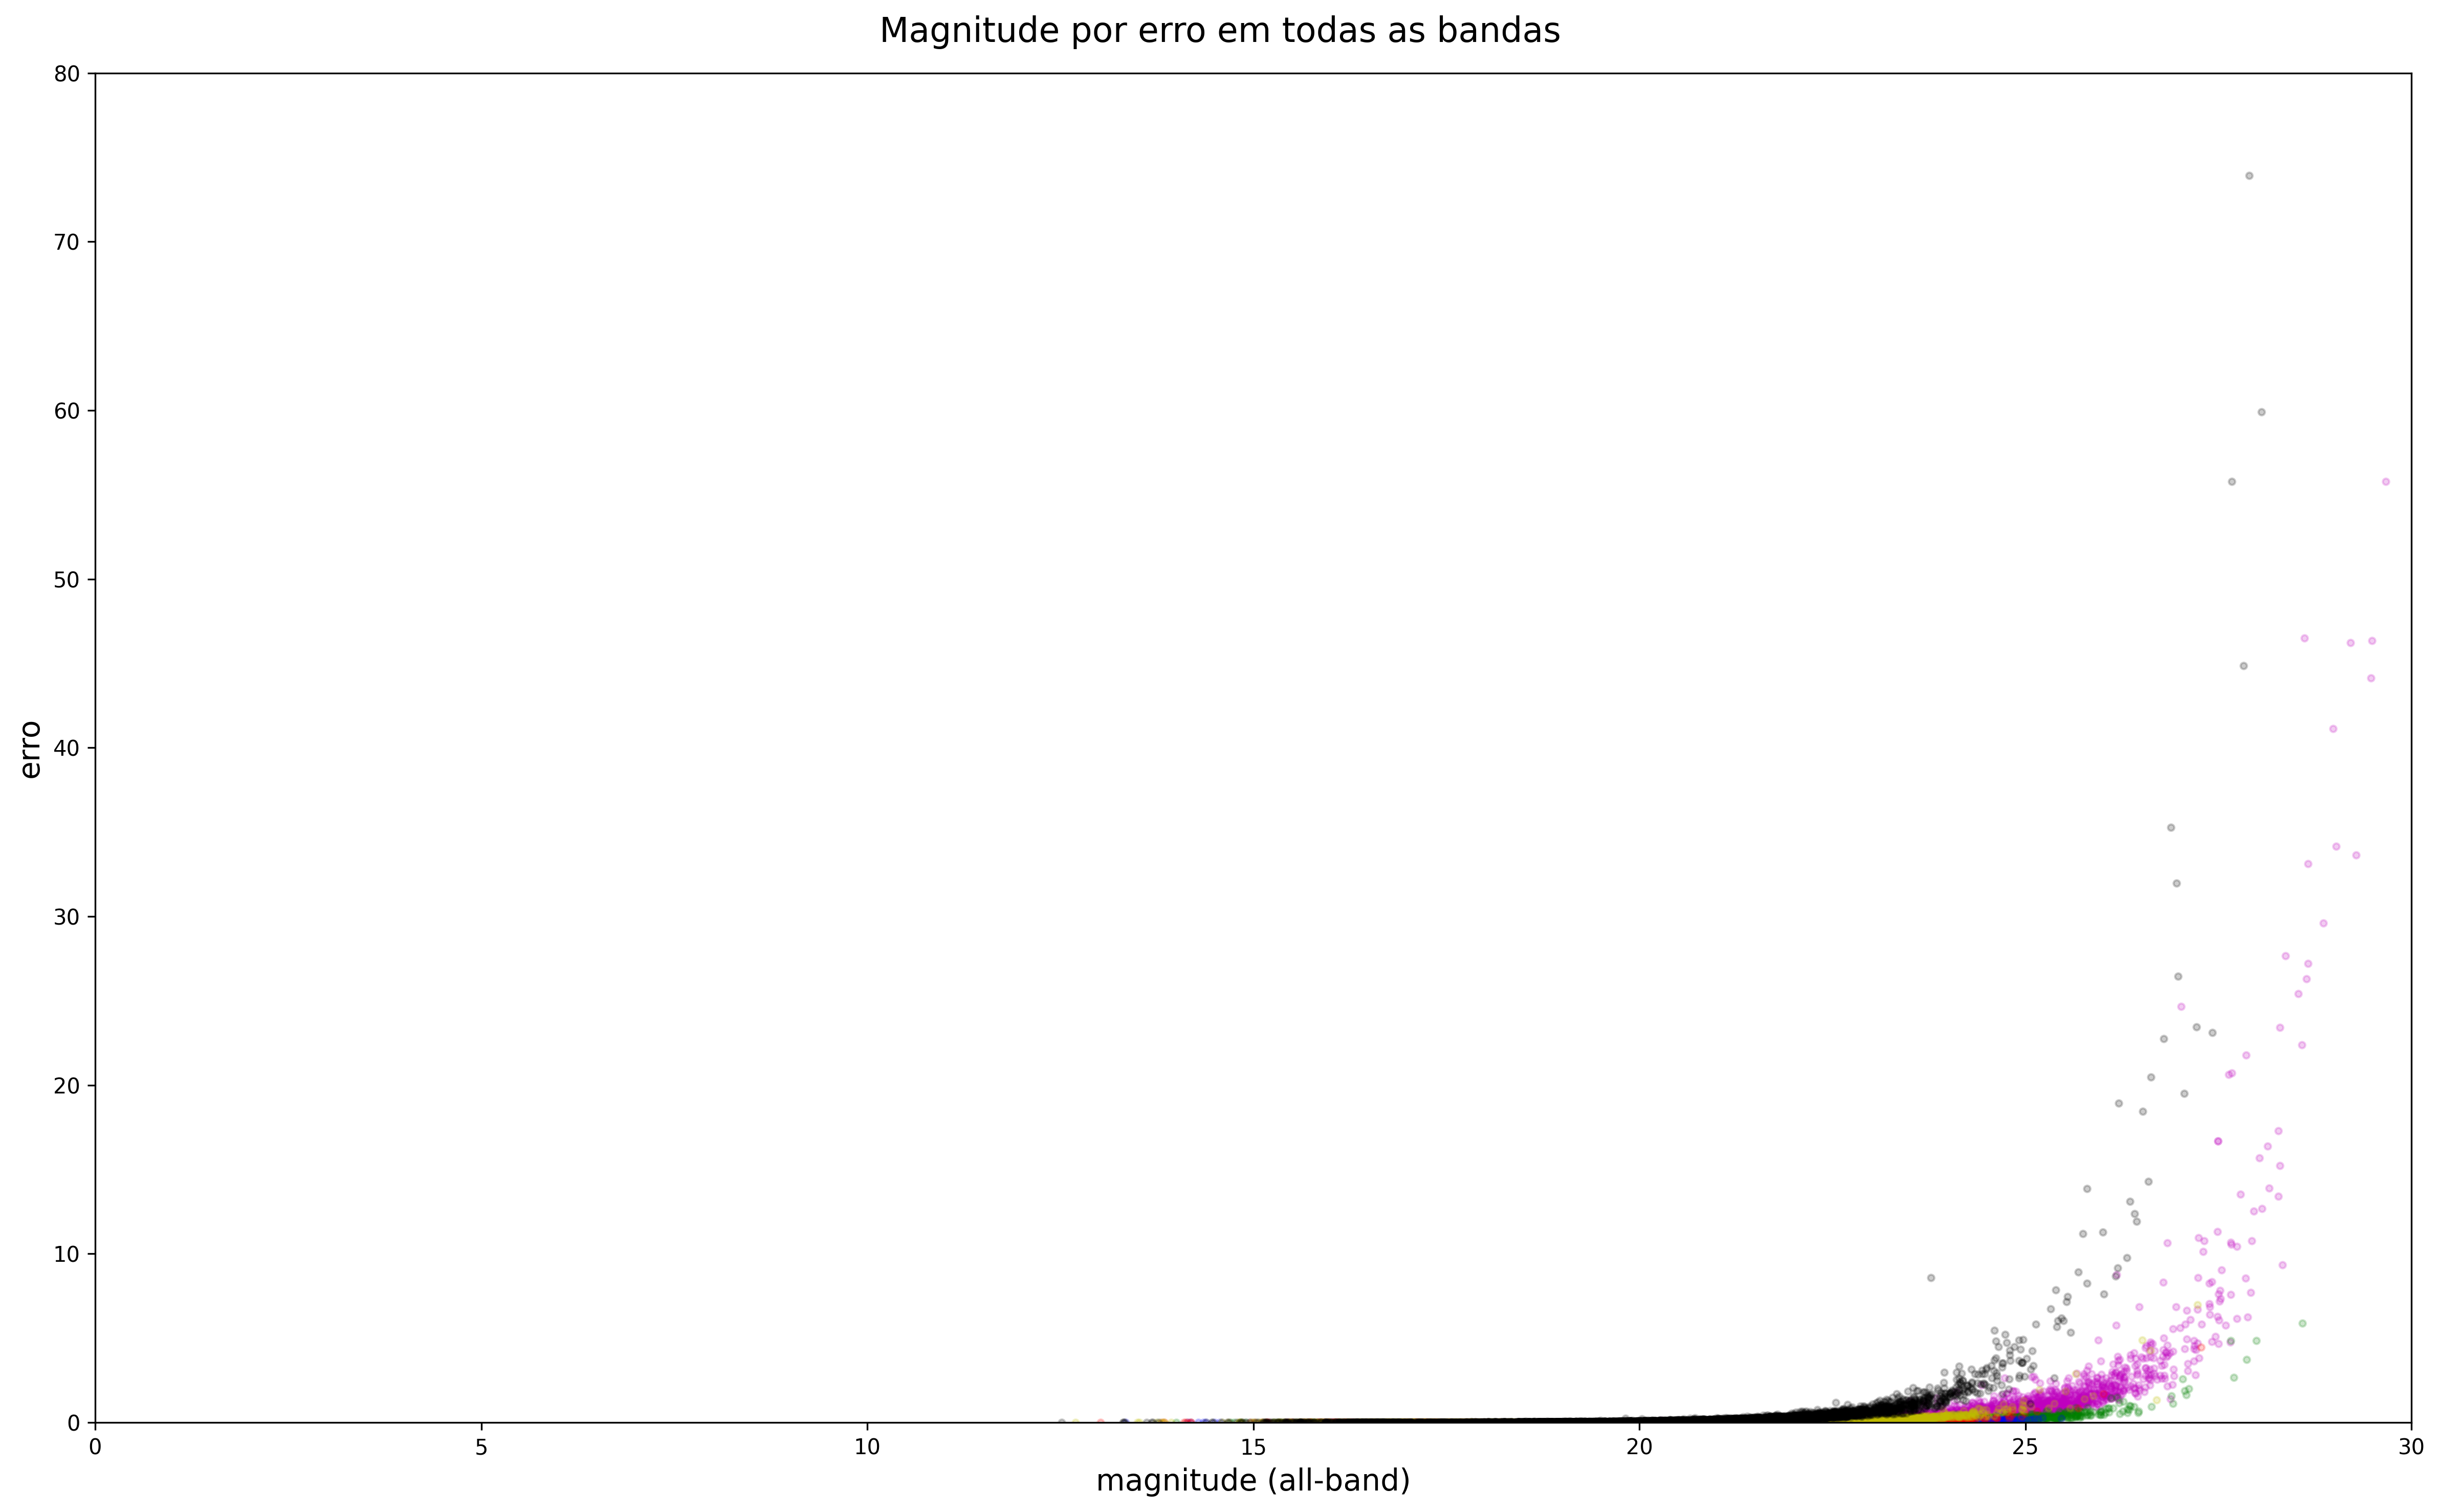

In [8]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude por erro em todas as bandas", fontsize=16)


for key, value in banda_cor.items():
    plt.plot(data_frame[f"{key}_auto"], data_frame[f"{key}_auto_err"], f"{value}.", alpha=0.2)
configuracoes_padrao("magnitude", "erro", "all", 30, 80)

## Histogramas

Na estatística, existe uma regra que ajuda a gente a calcular um bin. Sendo bin um intervalo onde para cada valor iremos pular de tanto em tanto.


<img src="https://files.realpython.com/media/fig-1.1d8bc9379e87.png" width="500"/>

In [9]:
def bin_width(series):
    """Freedman–Diaconis rule"""   
    
    q1, q3 = series.quantile(q=[0.25, 0.75])
    width = 2 * ((q3-q1)/(series.count()**(1./3.)))
    
    return width

Para montar nosso gráfico, pegaremos as amostras a cada 0.209 para mostrar

In [10]:
bin_width = bin_width(data_frame.u_auto)
bin_width

0.20911209022960497

aqui, definimos uma função que irá facilitar a criação dos nossos gráficos

In [11]:
def monta_grafico_hist(banda, cor, x_limit=120, y_limit=120):
    plt.hist(data_frame[f"{banda}_auto"], bins=np.arange(0,120, bin_width), color=cor)
    configuracoes_padrao("magnitude", "qtd", banda, x_limit, y_limit)

Analisando cada banda, novamente vemos o nosso ponto com valor alto aparecendo acima da magnitude 100.

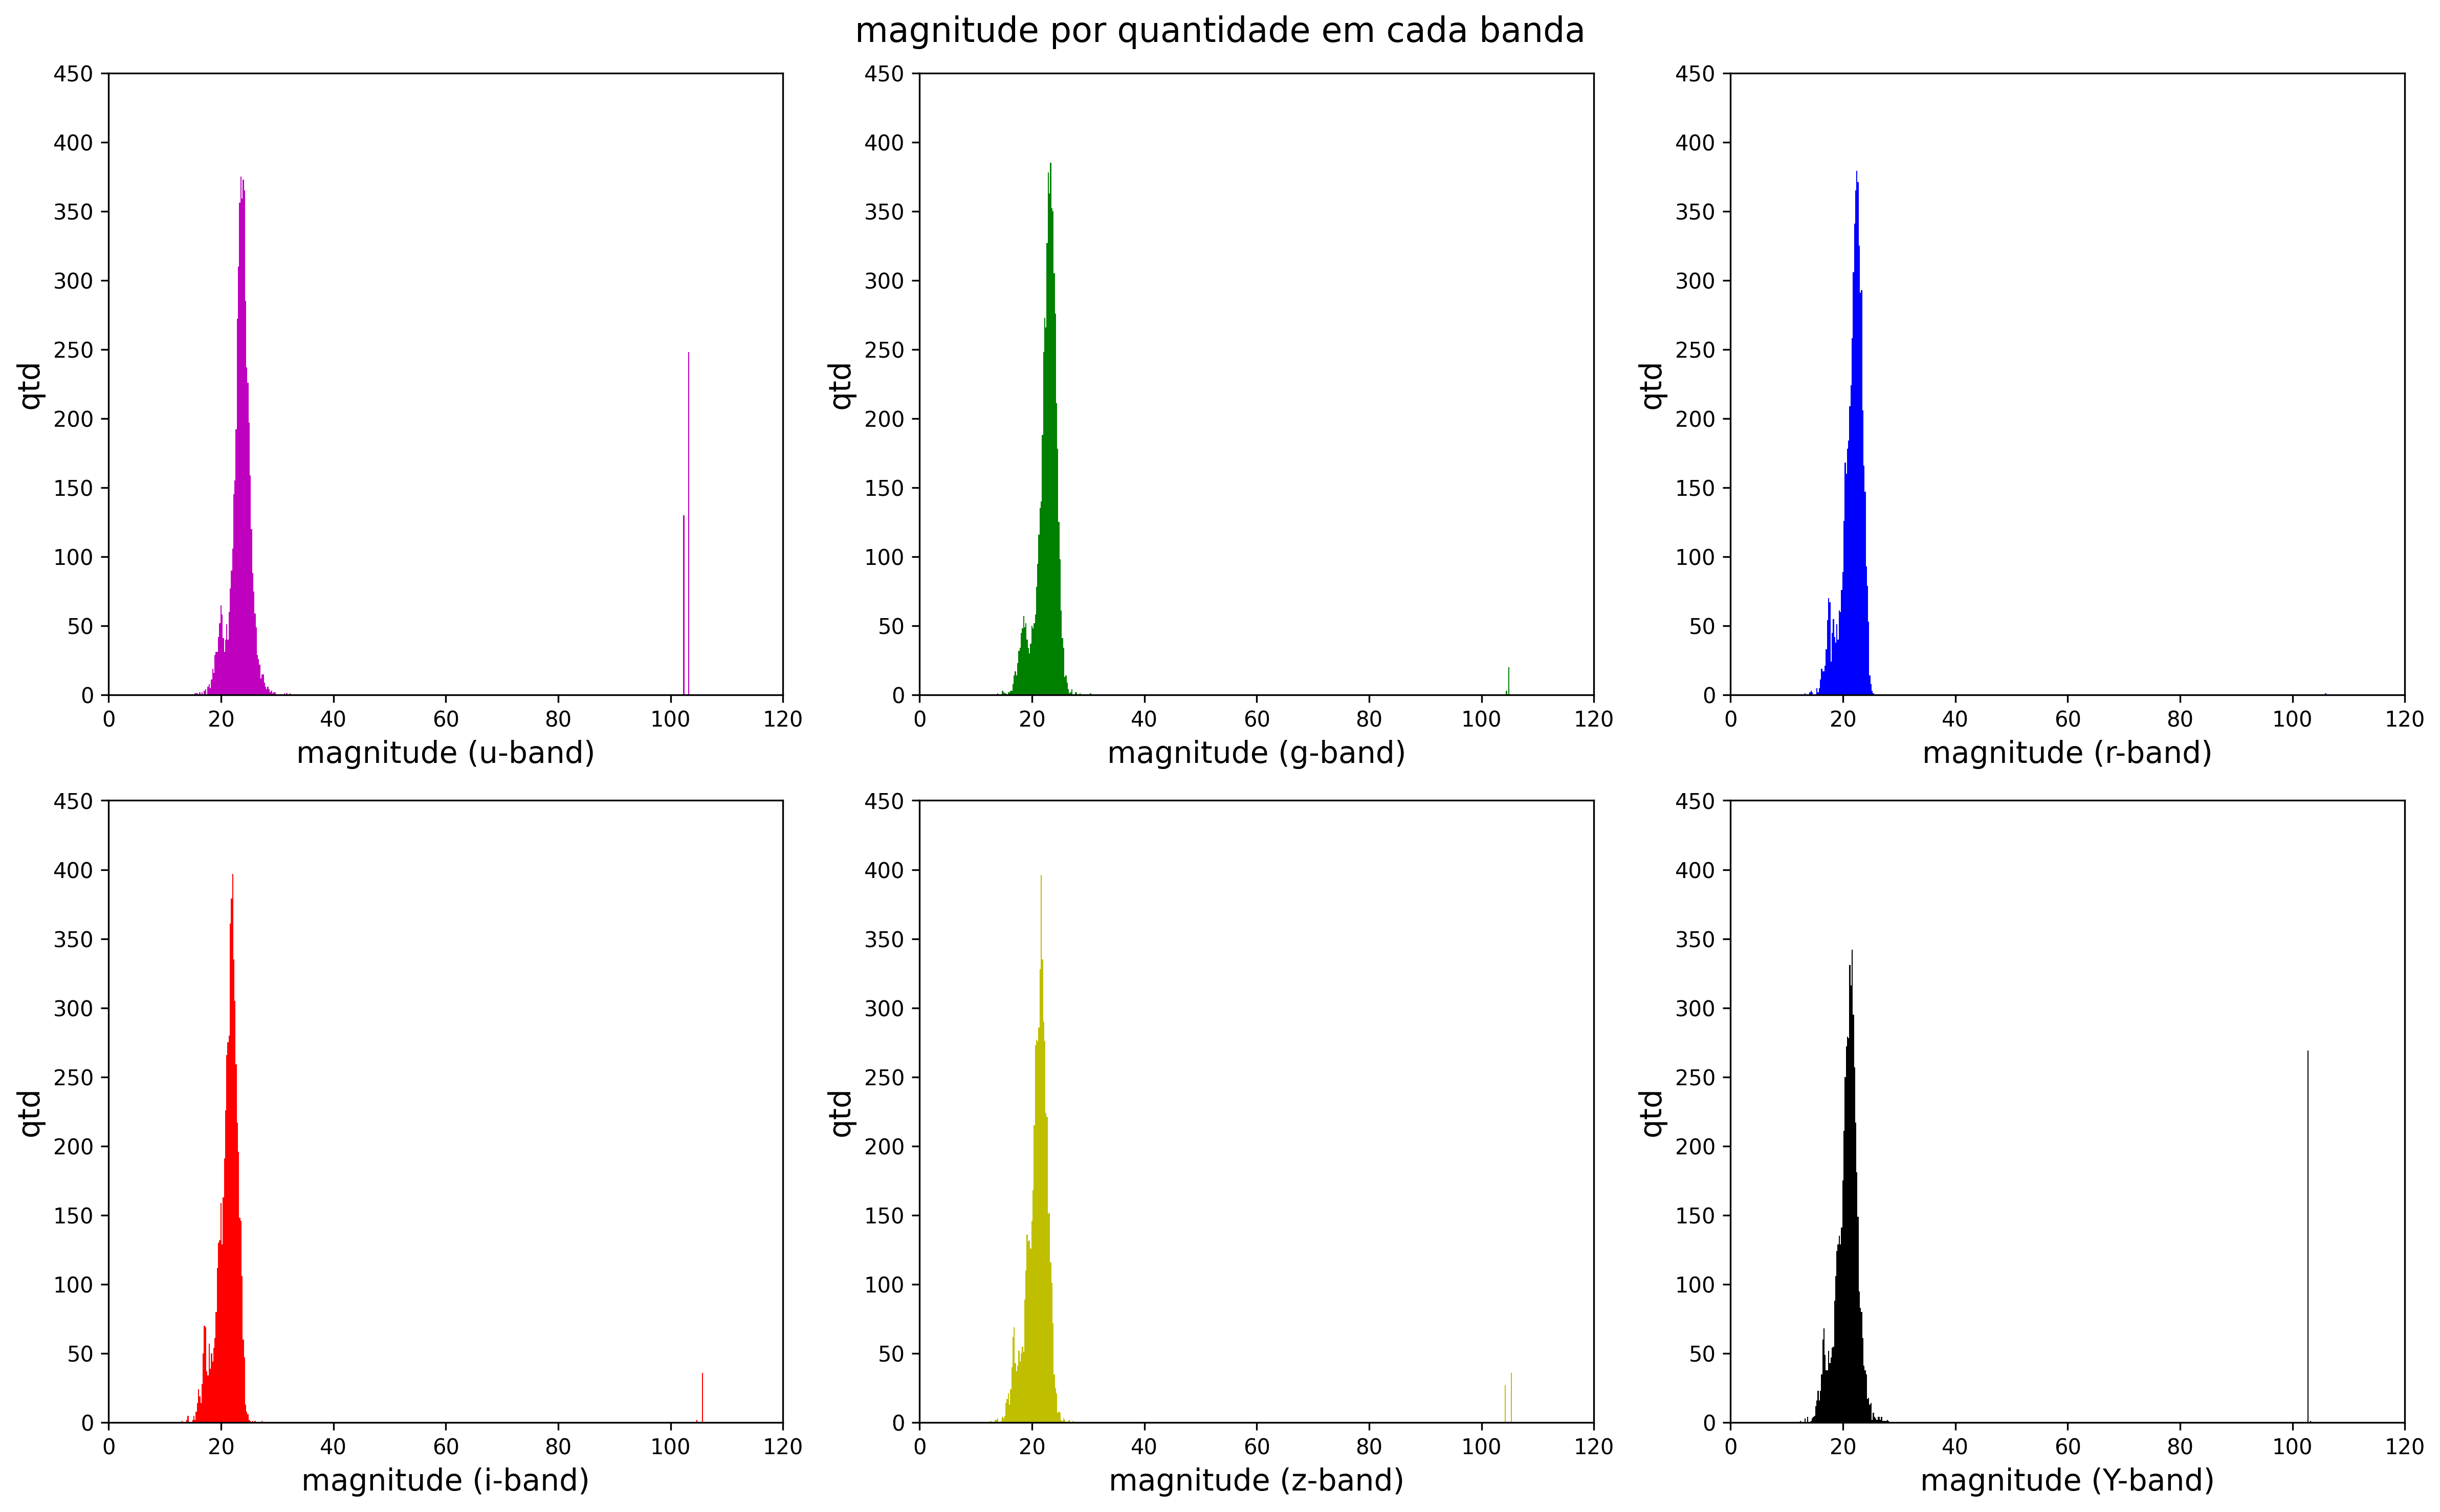

In [12]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("magnitude por quantidade em cada banda", fontsize=16)

pos = 1

for key, value in banda_cor.items():
    plt.subplot(2,3,pos)
    monta_grafico_hist(key, value, 120, 450)
    pos = pos + 1

Se ignorarmos esses pontos extremos, percebemos que a maior parte da nossa amostra fica entrea a magnitude 15 e 30

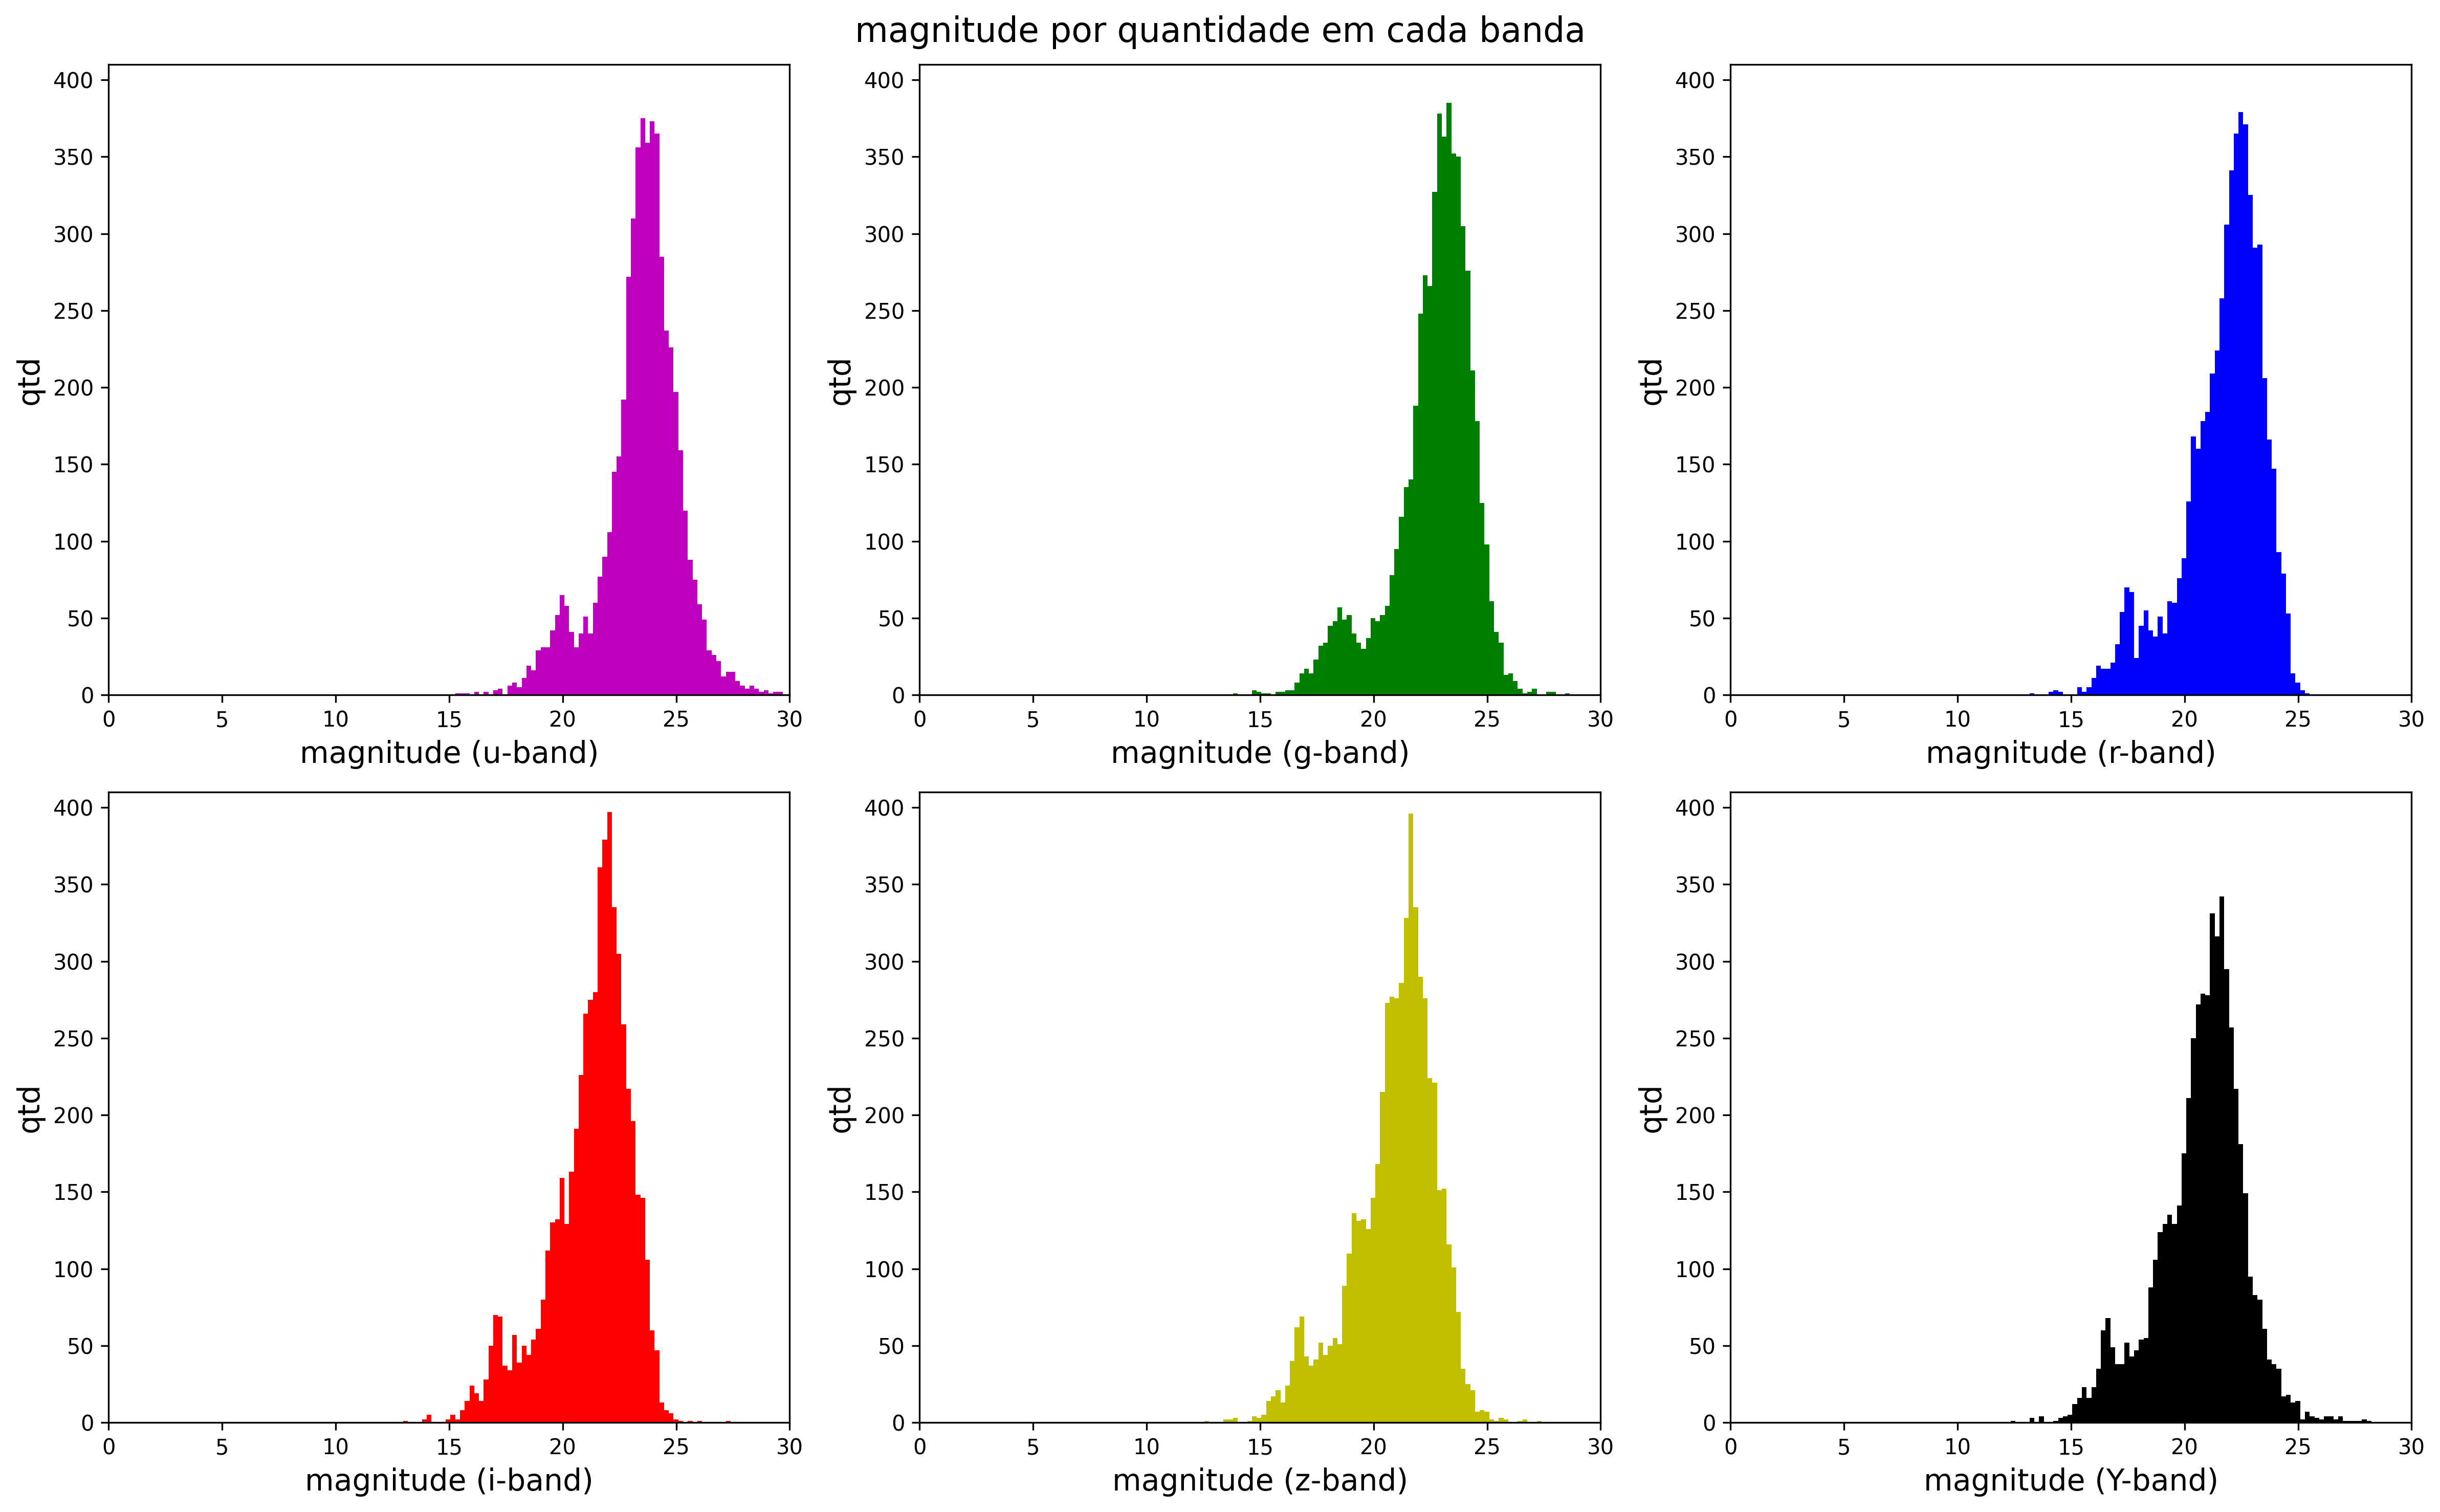

In [13]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("magnitude por quantidade em cada banda", fontsize=16)

pos = 1

for key, value in banda_cor.items():
    plt.subplot(2,3,pos)
    monta_grafico_hist(key, value, 30, 410)
    pos = pos +1

Aqui uma sobreposição de todas as bandas para melhor comparação.

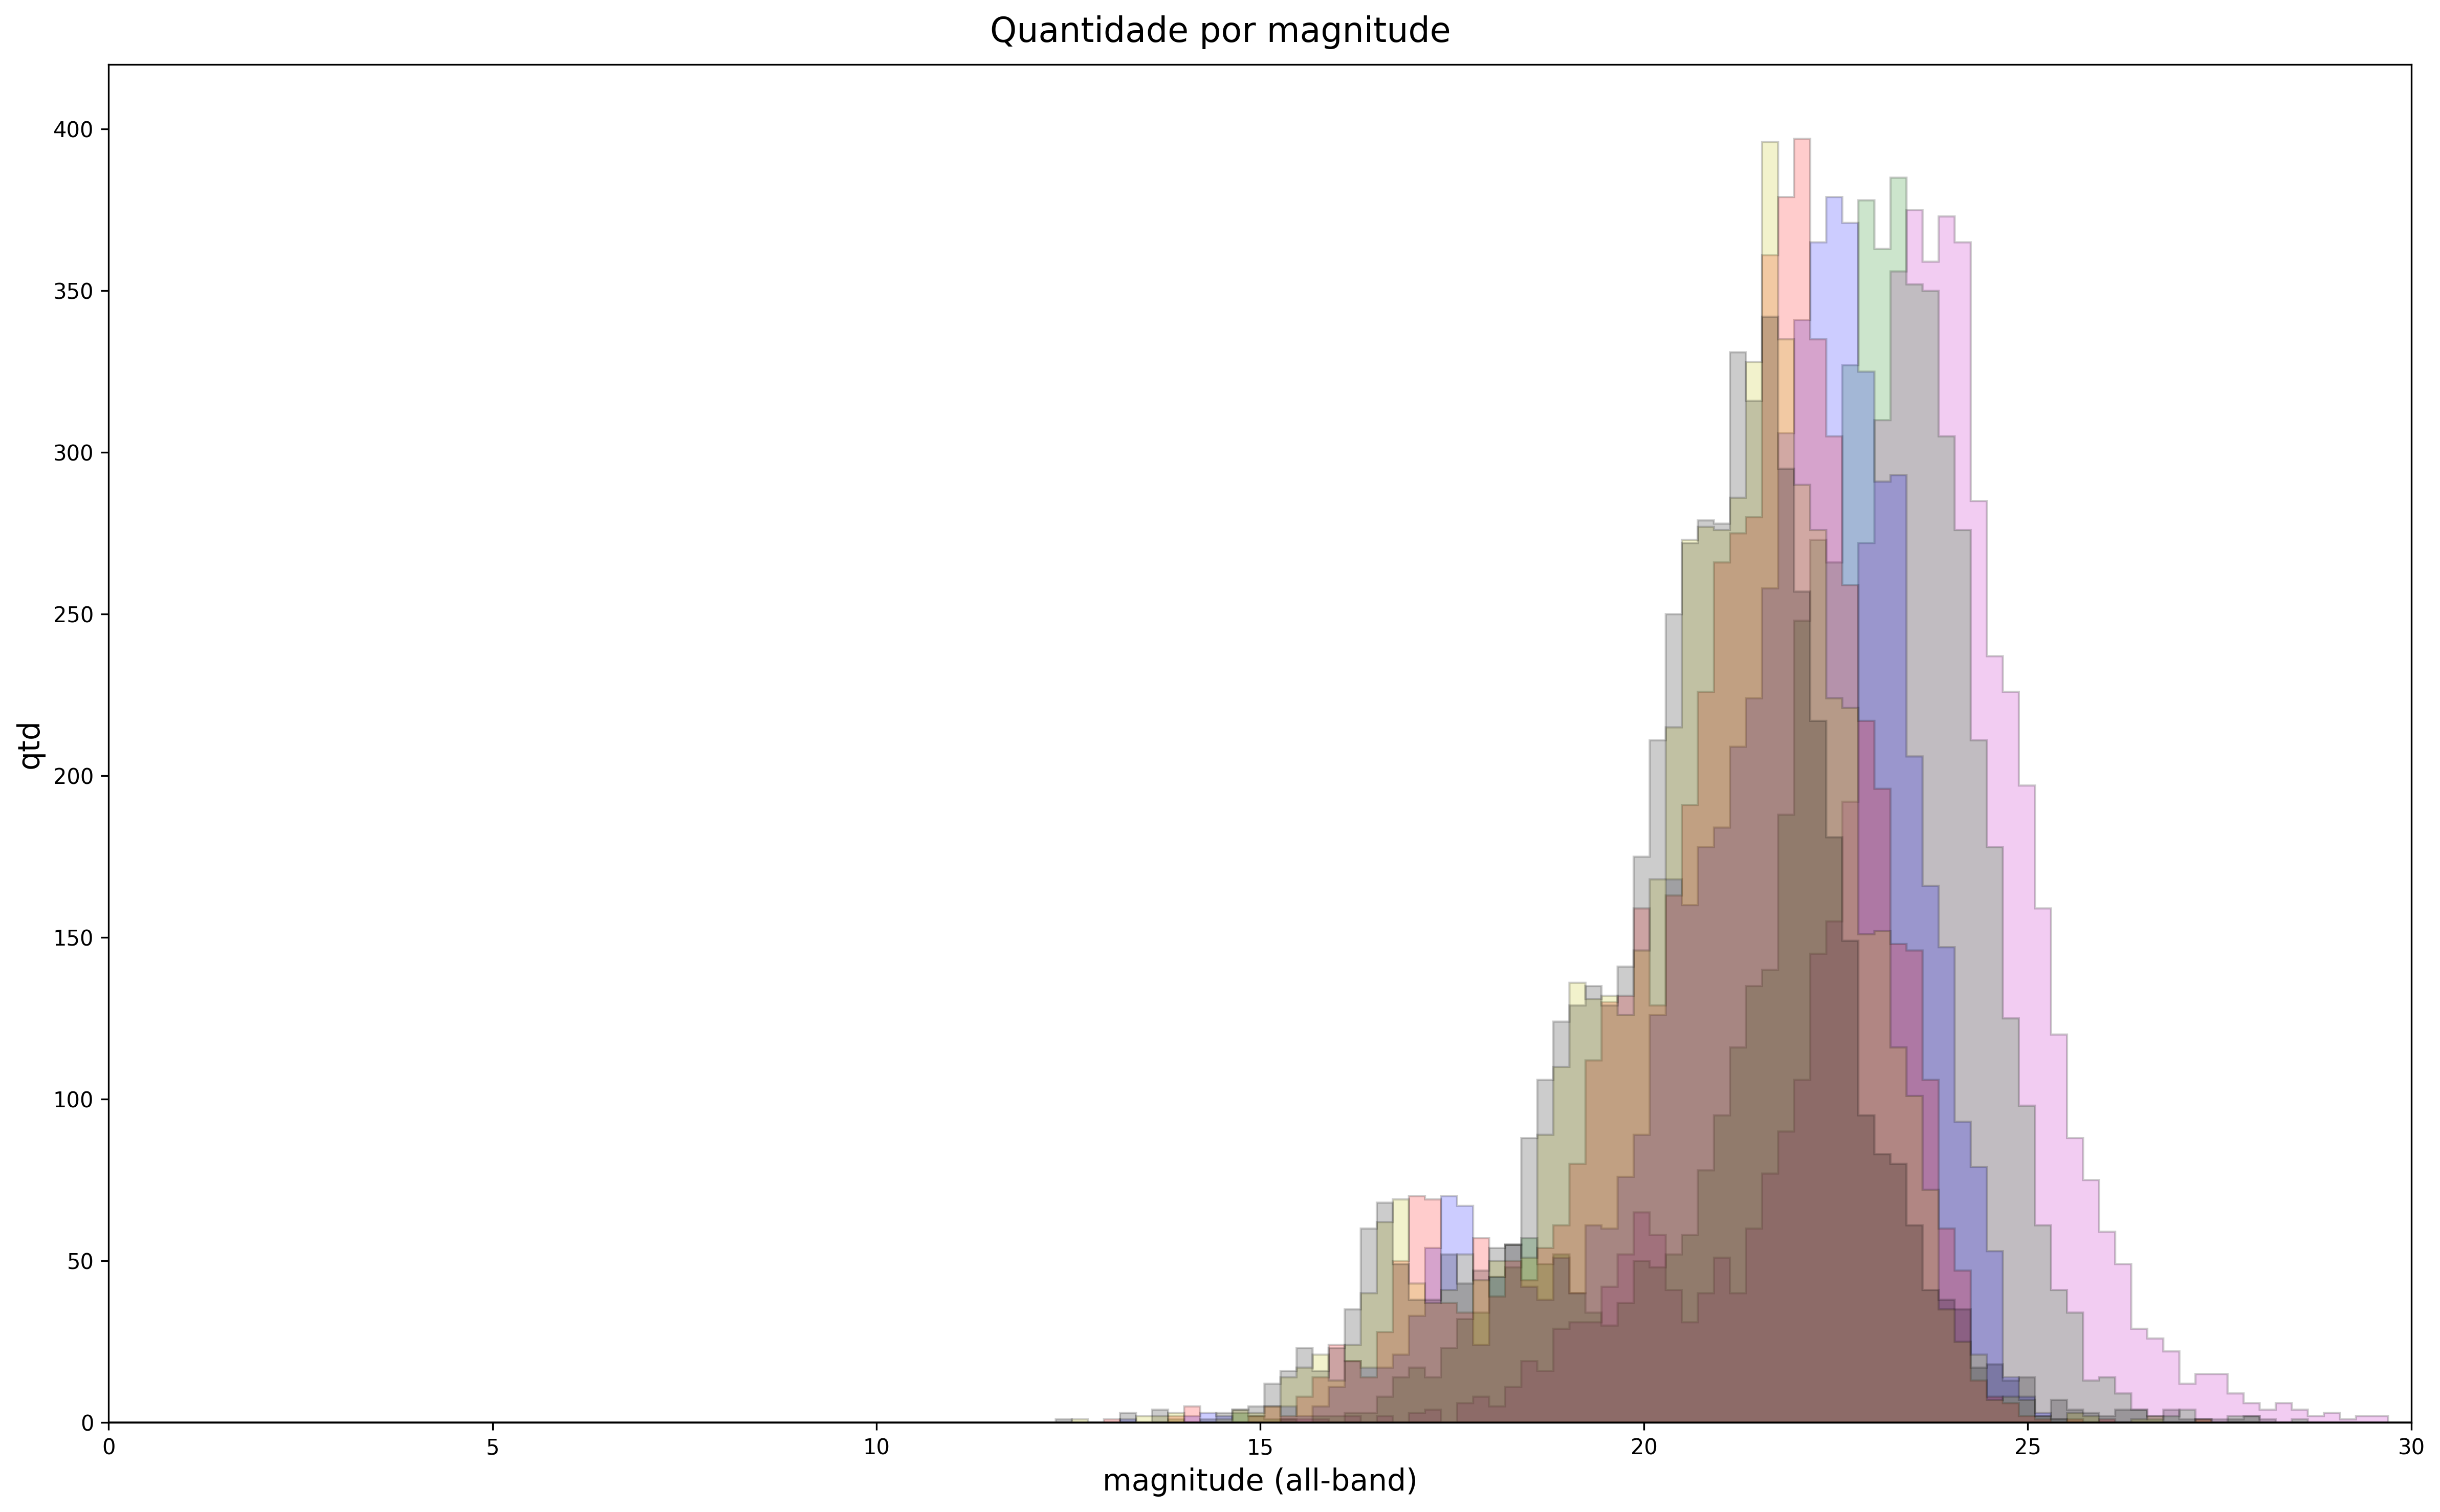

In [14]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Quantidade por magnitude", fontsize=16)


for key, value in banda_cor.items():
    plt.hist(data_frame[f"{key}_auto"], bins=np.arange(0,120, bin_width), color=value, label=key, alpha=0.2, ec="k", histtype="stepfilled")
configuracoes_padrao("magnitude", "qtd", "all", 30, 420)

Também podemos olhar que a nossa maior quantidade de itens com erro ficam muito próximo de zero.

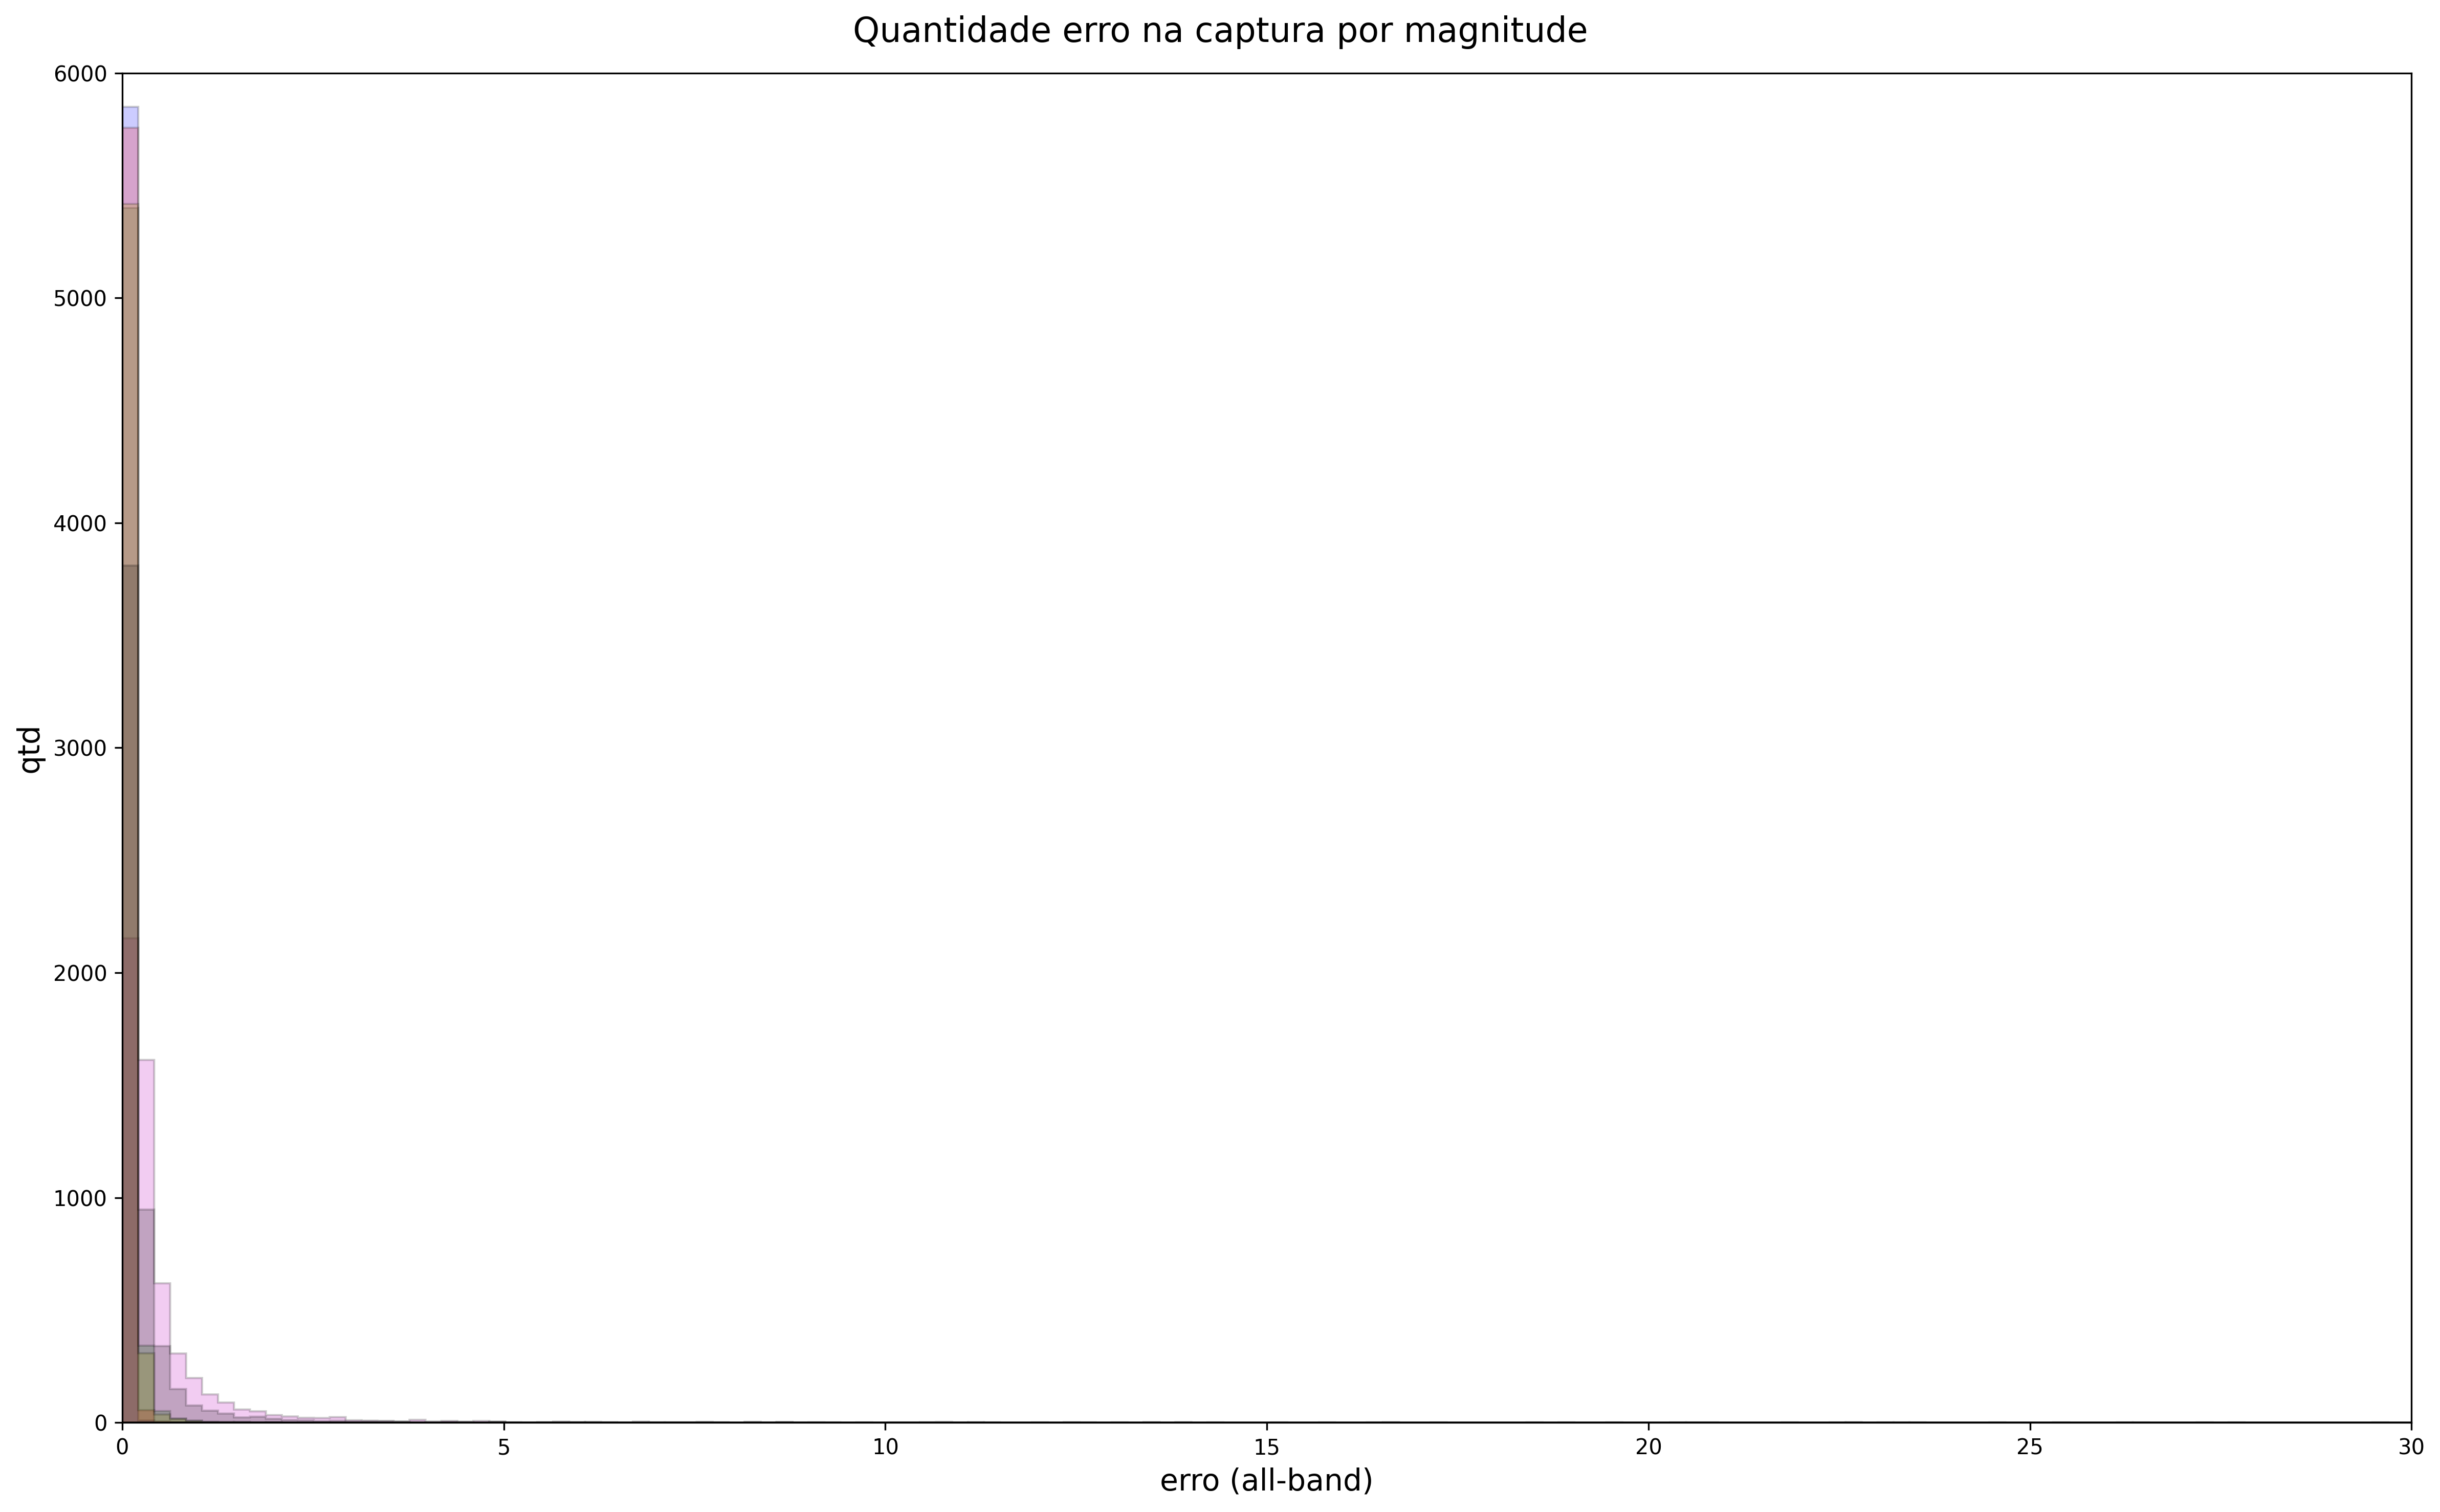

In [15]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Quantidade erro na captura por magnitude", fontsize=16)


for key, value in banda_cor.items():
        plt.hist(data_frame[f"{key}_auto_err"], bins=np.arange(0,120, bin_width), color=value, label=key, alpha=0.2, ec="k", histtype="stepfilled")
configuracoes_padrao("erro", "qtd", "all", 30, 6000)

### Localização da amostra no céu

Primeiro, importamos a lib Healpy que ajudará na visualização do céu e olharemos as colunas que estão dispostas para montar as coordenadas

In [80]:
import healpy as hp

In [17]:
data_frame.head()

,u_auto,u_auto_err,u_det,u_det_err,g_auto,g_auto_err,g_det,g_det_err,r_auto,r_auto_err,...,Y_auto,Y_auto_err,Y_det,Y_det_err,z,ra,dec,z_flags,field_id,number
0,23.845972,0.480186,23.305986,0.239104,22.062654,0.037741,21.884624,0.024168,20.502991,0.014286,...,19.062408,0.019952,18.800480,0.011729,0.594322,208.959414,4.845255,3.0,17.0,889.0
1,21.917076,0.126927,22.007544,0.093806,21.291616,0.027932,21.192692,0.016703,20.074959,0.013259,...,18.930664,0.026647,18.570171,0.012550,0.552461,209.389025,4.861304,3.0,17.0,2022.0
2,20.071426,0.027023,20.061445,0.015987,18.413782,0.002754,18.341980,0.001919,17.516130,0.001616,...,16.576685,0.003553,16.391659,0.001830,0.112136,209.469526,4.872648,3.0,17.0,3069.0
3,18.878786,0.018502,18.971598,0.011839,17.654385,0.002297,17.733349,0.001687,17.008606,0.001816,...,16.257137,0.005242,16.178761,0.002836,0.153708,209.528769,4.876163,3.0,17.0,3582.0
4,20.335739,0.049650,20.186678,0.025700,18.742779,0.004415,18.517990,0.002734,17.696106,0.002626,...,16.826147,0.006224,16.557632,0.002881,0.177716,208.824856,4.880909,3.0,17.0,3833.0


Como nos foi disponibilizado as colunas de ascendência de reta e declinação, podemos fazer uma associação (x,y) e localizar onde, no céu foi coletado esses dados.

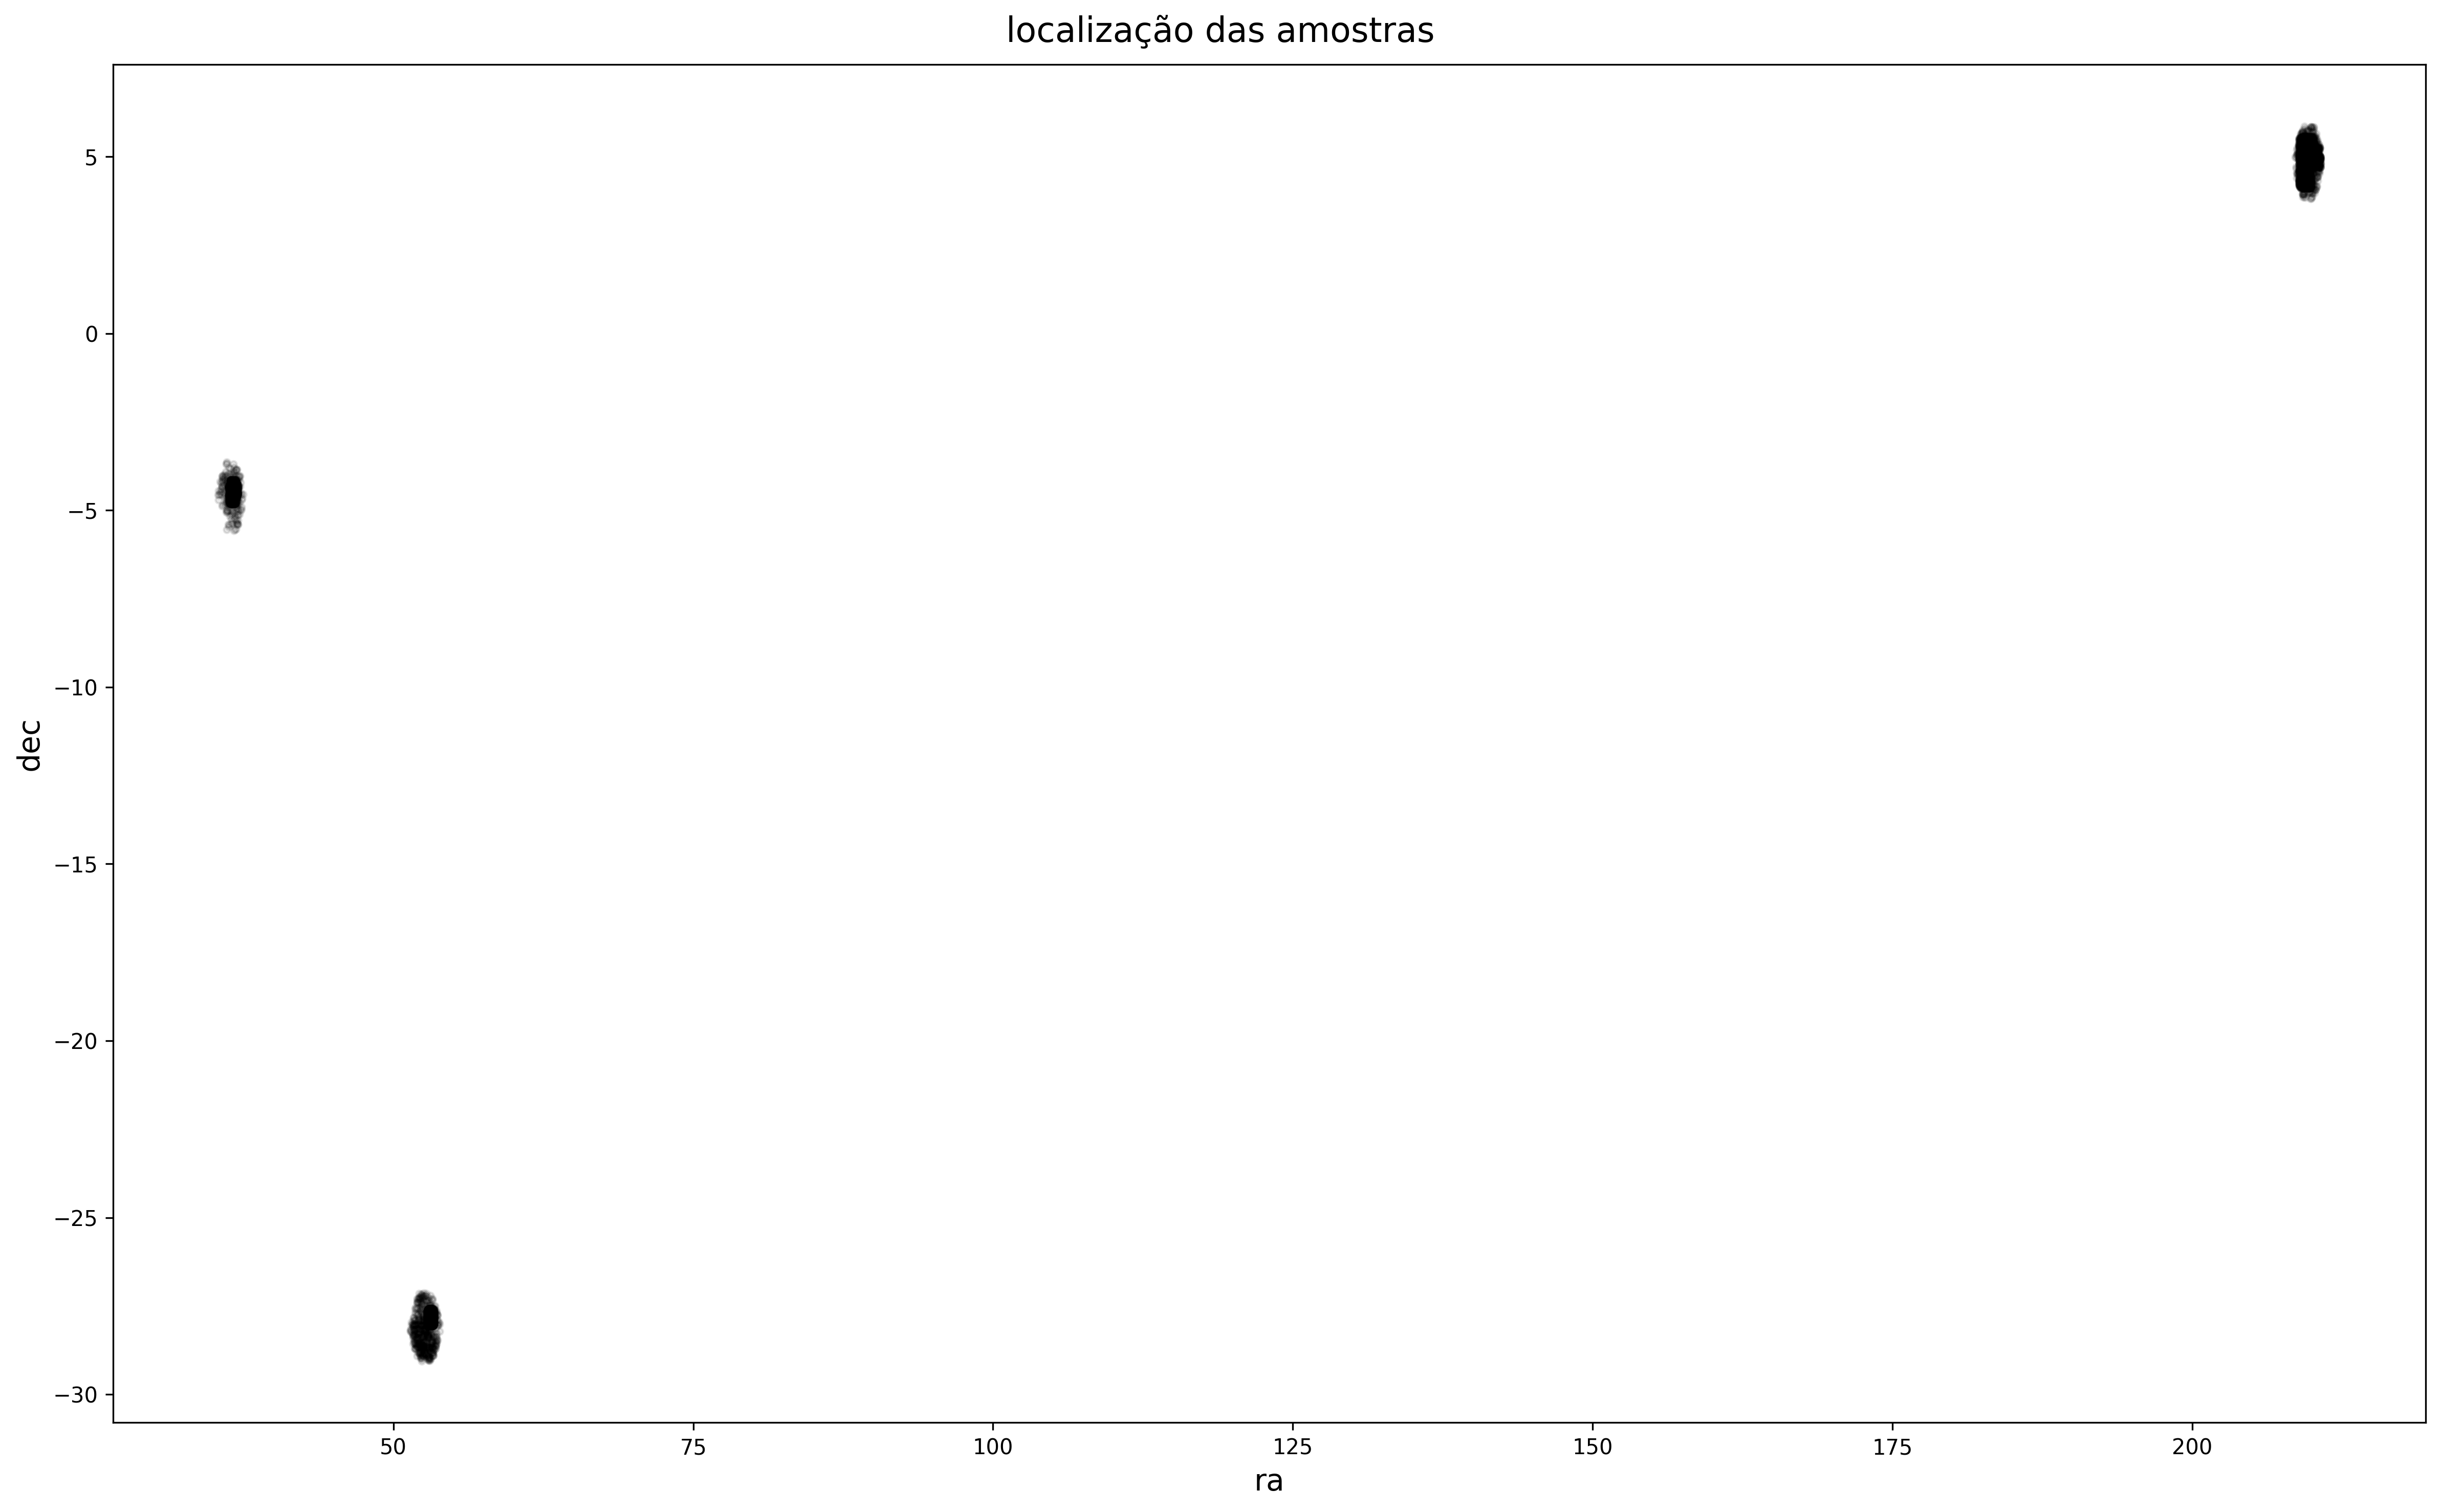

In [16]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("localização das amostras", fontsize=16)


plt.plot(data_frame.ra, data_frame.dec, f"{value}.", alpha=0.1)
plt.xlabel("ra", fontsize=14)
plt.ylabel("dec", fontsize=14)
plt.tight_layout()

Existem melhores formas de fazer uma query, mas a ideia aqui é ter uma noção, então, foi selecionado para cada "bolinho" capturado, a média da ascenção de reta (ra) e declinação (dec)

In [54]:
medias_1 = data_frame.query("ra > 50 & ra < 75 & dec < -25").mean()
print(medias_1.ra, medias_1.dec)
medias_2 = data_frame.query("ra < 50 & dec < 0 & dec > -10").mean()
print(medias_2.ra, medias_2.dec)
medias_3 = data_frame.query("ra > 50 & dec > 0").mean()
print(medias_3.ra, medias_3.dec)

52.982684136485226 -27.914789136415074
36.615372028534296 -4.496395828915506
209.6269803400604 4.885842334037079


logo após foi, para cada média dos bolinhos criado vetores de localização para depois conseguir mostrar no mapa.

In [57]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)

vec1 = hp.ang2vec(round(medias_1.ra, 2), round(medias_1.dec,2), True)
vec2 = hp.ang2vec(round(medias_2.ra, 2), round(medias_2.dec,2), True)
vec3 = hp.ang2vec(round(medias_3.ra, 2), round(medias_3.dec,2), True)

print(vec1, vec2, vec3)

[ 0.53206059  0.7055557  -0.46808405] [ 0.80013513  0.59466625 -0.0784591 ] [-0.86607233 -0.49259755  0.08524303]


para cada vetor criado, foi selecionado todos os pontos com distancia de 1 radianos para mostrar no mapa, marcando assim a localização no céu

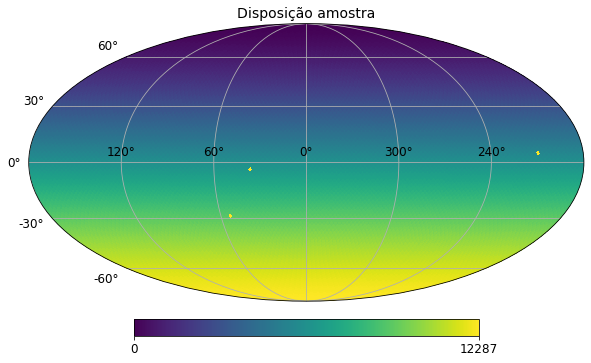

In [81]:
ipix_disc1 = hp.query_disc(nside=32, vec=vec1, radius=np.radians(1))
ipix_disc2 = hp.query_disc(nside=32, vec=vec2, radius=np.radians(1))
ipix_disc3 = hp.query_disc(nside=32, vec=vec3, radius=np.radians(1))

m = np.arange(NPIX)
m[ipix_disc1] = m.max()
m[ipix_disc2] = m.max()
m[ipix_disc3] = m.max()

hp.projview(m, title="Disposição amostra", graticule=True, graticule_labels=True, projection_type="mollweide")